# create new data (最好在开发机器上处理)

## 为新数据集生成标注
1. 构建数据目录data_root如下
   ```
   $data_root
       -$to_add_dataset
           - images
               - xxx.png
               - xxx.png
           - labels
               - xxx.csv
               - xxx.csv
       -$base_dataset
           - annotations
               - instances_train.json
               - isntances_val.json
   ```
   
2. 生成整个数据集的标注
```sh
cd $data_root/${to_add_dataset}

python \
/apdcephfs_cq7/share_1447896/xuehuiyu/Workspace/work/detection_and_segmentation/DINO/advertisment_parsing/tools/biaobei_csv_to_coco_json.py \
  --csv labels/ --img 'images/' --save-json 'annotations/instances.json'
```

3. 划分训练集和测试集，获得子集的标注文件
```sh
python \
/apdcephfs_cq7/share_1447896/xuehuiyu/Workspace/work/detection_and_segmentation/DINO/advertisment_parsing/tools/split_train_val_dataset.py \
--all-ann-file "annotations/instances.json" --save-prefix "annotations/instances_" \
--datasets-name '["train","val"]' --set-ratio='[0.9,0.1]' --num-phase 10 \
--image-root "images" --save-image-root "images" --save-image-mode "move"
```

4. 复制到cq磁盘中

```sh
export cq_dataset_dir = "/apdcephfs_cq7/share_1447896/xuehuiyu/Workspace/work/dataset/"
cp -r $to_add_dataset $cq_dataset_dir/
```

## 合并到base数据集中
1. 定义环境变量
```sh
export data_root="~/work_tmp/dataset/"      # change to yours dev dataset dir
export base_dataset="advertismentv1/8class"                      # 基础的数据集
export to_add_dataset="add_commodity_1666"  # 待添加的数据集
export new_dataset="advertisment/v2_8class"
```

2. 合并标注文件 （类别编号相同，没有重名的图片）
```sh
# dev: ~/work_tmp/dataset/" 
# cq: /apdcephfs_cq7/share_1447896/xuehuiyu/Workspace/work/dataset
cd $data_root/  # dev or cq的dataset目录
python \
/apdcephfs_cq7/share_1447896/xuehuiyu/Workspace/work/detection_and_segmentation/DINO/advertisment_parsing/tools/merge_or_reorder_coco_dataset.py \
--coco-json-files "${base_dataset}/annotations/instances_val.json,${to_add_dataset}/annotations/instances_val.json," \
--save-json-path "${new_dataset}/annotations/instances_val.json" --reorder True

python \
/apdcephfs_cq7/share_1447896/xuehuiyu/Workspace/work/detection_and_segmentation/DINO/advertisment_parsing/tools/merge_or_reorder_coco_dataset.py \
--coco-json-files "${base_dataset}/annotations/instances_train.json,${to_add_dataset}/annotations/instances_train.json" \
--save-json-path "${new_dataset}/annotations/instances_train.json" --reorder True
```

```
load dataset with 2301 images, 22459 annotations, 8 categories.
load dataset with 172 images, 1861 annotations, 8 categories.
merged dataset with 2473 images, 24320 annotations, 8 categories.
merged json save to：advertisment/v2_8class/annotations/instances_val.json

load dataset with 20718 images, 202787 annotations, 8 categories.
load dataset with 1494 images, 16273 annotations, 8 categories.
merged dataset with 22212 images, 219060 annotations, 8 categories.
merged json save to：advertisment/v2_8class/annotations/instances_train.json
```

3. 复制到cq磁盘中

```sh
export cq_dataset_dir = "/apdcephfs_cq7/share_1447896/xuehuiyu/Workspace/work/dataset/"
cp -r ${new_dataset} $cq_dataset_dir/advertisment/
```

4. 合并数据集图片

```sh
cp ${base_dataset}/images/train/* ${new_dataset}/images/train -r
cp ${base_dataset}/images/val/* ${new_dataset}/images/val -r

cp ${to_add_dataset}/images/train/* ${new_dataset}/images/train -r
cp ${to_add_dataset}/images/val/* ${new_dataset}/images/val -r
```

# 对应的代码接口

In [2]:
import os
os.chdir("../..")

In [35]:

from advertisment_parsing.tools.split_train_val_dataset import split_and_save_dataset
split_and_save_dataset(
    "/data/home/xuehuiyu/work_tmp/dataset/add_commodity_1688/annotations/instances.json",
    "/data/home/xuehuiyu/work_tmp/dataset/add_commodity_1688/annotations/instances_",
    datasets_name = ["train", "val"], set_ratio=[0.9, 0.1], num_phase=10, 
    save_image_root="/data/home/xuehuiyu/work_tmp/dataset/add_commodity_1688/images/",
    image_root="/data/home/xuehuiyu/work_tmp/dataset/add_commodity_1688/images/",
    save_image_mode="move"
)

loading annotations into memory...
Done (t=0.28s)
creating index...
index created!
Image count of splited dataset: train: 1494(0.897) val: 172(0.103)
Image count of splited dataset: train: 16235(0.895) val: 1899(0.105)
subset (train) json save to：/data/home/xuehuiyu/work_tmp/dataset/add_commodity_1688/annotations/instances_train.json
subset (val) json save to：/data/home/xuehuiyu/work_tmp/dataset/add_commodity_1688/annotations/instances_val.json


In [3]:
from advertisment_parsing.tools.merge_or_reorder_coco_dataset import merge_or_reorder_dataset

In [4]:
merge_or_reorder_dataset(
    [
        "/apdcephfs_cq7/share_1447896/xuehuiyu/Workspace/work/dataset/advertismentv1/8class/annotations/instances_val.json",
        "/apdcephfs_cq7/share_1447896/xuehuiyu/Workspace/work/dataset/add_commodity_1666/annotations/instances_val.json",
    ],
    "/apdcephfs_cq7/share_1447896/xuehuiyu/Workspace/work/dataset/advertismentv2/8class/annotations/instances_val.json"
)

load dataset with 2301 images, 22459 annotations, 8 categories.
load dataset with 172 images, 1861 annotations, 8 categories.
merged dataset with 2473 images, 24320 annotations, 8 categories.
merged json save to：/apdcephfs_cq7/share_1447896/xuehuiyu/Workspace/work/dataset/advertismentv2/8class/annotations/instances_val.json


In [ ]:
merge_or_reorder_dataset(
    [
        "/apdcephfs_cq7/share_1447896/xuehuiyu/Workspace/work/dataset/advertismentv1/8class/annotations/instances_train.json",
        "/apdcephfs_cq7/share_1447896/xuehuiyu/Workspace/work/dataset/add_commodity_1666/annotations/instances_train.json",
    ],
    "/apdcephfs_cq7/share_1447896/xuehuiyu/Workspace/work/dataset/advertismentv2/8class/annotations/instances_train.json"
)

In [3]:
print(2473 == 172 + 2301)
print(22208 == 1494 + 20718)

True
False


In [3]:
import json

jd = json.load(open('/apdcephfs_cq7/share_1447896/xuehuiyu/Workspace/work/dataset/advertisment/v2_8class/annotations/instances_val.json'))
print(len(jd['annotations']))

24320


In [6]:
jd2 = json.load(open('/apdcephfs_cq7/share_1447896/xuehuiyu/Workspace/work/dataset/add_commodity_1666/annotations/instances_val.json'))
jd1 = json.load(open('/apdcephfs_cq7/share_1447896/xuehuiyu/Workspace/work/dataset/advertismentv1/8class/annotations/instances_val.json'))
print(len(jd1['annotations']))
print(len(jd2['annotations']))

22459
1861


In [1]:
DINO_HOME="../../"
import os
os.chdir(DINO_HOME)

In [5]:
ls ../../dataset

add_commodity_1666/  advertisment/  advertisment_all/  advertismentv1@


In [45]:
import os, sys
import torch, json
import numpy as np

from main import build_model_main
from util.slconfig import SLConfig
from datasets import build_dataset
from util.visualizer import COCOVisualizer
from util import box_ops

def build_our_dataset(coco_path, image_set='val'):
    model_config_path = f"advertisment_parsing/config/DINO/DINO_4scale_swin_30c.py" # change the path of the model config file
    # model_checkpoint_path = f"logs/advertisment_parsing_4gpu/advertisment/v2_8class_3/DINO/R50-MS4/checkpoint0004.pth" # change the path of the model checkpoint
    # See our Model Zoo section in README.md for more details about our pretrained models.
    args = SLConfig.fromfile(model_config_path) 
    args.device = 'cuda' 
    
    from advertisment_parsing.tools.dataset_config import category_to_id
    id2name = {id: cat for cat, id in category_to_id.items()}
    
    args.dataset_file = 'coco'
    args.coco_path = coco_path # the path of coco
    args.fix_size = False
    
    dataset_val = build_dataset(image_set=image_set, args=args)
    return dataset_val

def show_data(dataset, idx=-1):
    image, targets = dataset_val2[idx]

    print(targets)
    # build gt_dict for vis
    box_label = [id2name[int(item)] for item in targets['labels']]
    gt_dict = {
        'boxes': targets['boxes'],
        'image_id': targets['image_id'],
        'size': targets['size'],
        'box_label': box_label,
    }
    vslzr = COCOVisualizer()
    vslzr.visualize(image, gt_dict, savedir=None)

In [ ]:
add_dataset = build_our_dataset("../../dataset/add_commodity_1666/", "val")
merge_dataset = build_our_dataset("datasets/data/advertisment/v2_8class/", "val")
merge_dataset_4 = build_our_dataset("datasets/data/advertisment/v2_8class_4/", "val")
merge_dataset_2 = build_our_dataset("datasets/data/advertisment/v2_8class_2/", "val")

data_aug_params: {
  "scales": [
    480,
    512,
    544,
    576,
    608,
    640,
    672,
    704,
    736,
    768,
    800
  ],
  "max_size": 1333,
  "scales2_resize": [
    400,
    500,
    600
  ],
  "scales2_crop": [
    384,
    600
  ]
}
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
data_aug_params: {
  "scales": [
    480,
    512,
    544,
    576,
    608,
    640,
    672,
    704,
    736,
    768,
    800
  ],
  "max_size": 1333,
  "scales2_resize": [
    400,
    500,
    600
  ],
  "scales2_crop": [
    384,
    600
  ]
}
loading annotations into memory...
Done (t=0.15s)
creating index...
index created!


{'boxes': tensor([[0.2604, 0.2695, 0.2198, 0.0691]]), 'labels': tensor([4]), 'image_id': tensor([22211]), 'area': tensor([7367.8667]), 'iscrowd': tensor([0]), 'orig_size': tensor([1280,  720]), 'size': tensor([722, 672])}


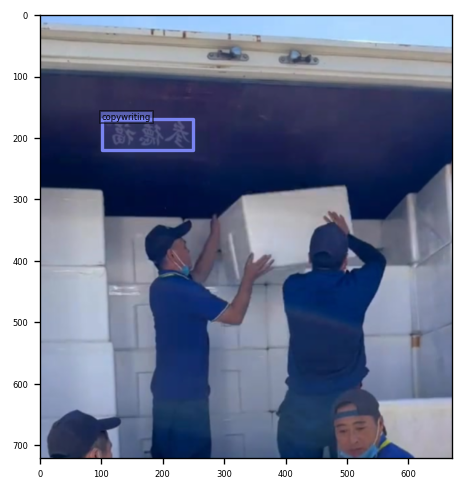

{'boxes': tensor([[0.8310, 0.8910, 0.1170, 0.0681],
        [0.7294, 0.1525, 0.1890, 0.0360],
        [0.4959, 0.7196, 0.5356, 0.0652],
        [0.2582, 0.7916, 0.1677, 0.0360]]), 'labels': tensor([8, 4, 4, 4]), 'image_id': tensor([22211]), 'area': tensor([ 7970.5566,  6797.6855, 34891.5039,  6031.2798]), 'iscrowd': tensor([0, 0, 0, 0]), 'orig_size': tensor([1280,  720]), 'size': tensor([1333,  750])}


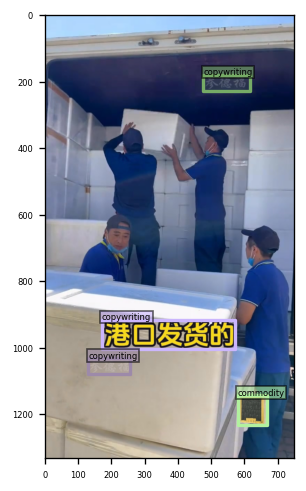

{'boxes': tensor([[0.1690, 0.8910, 0.1170, 0.0681],
        [0.2706, 0.1525, 0.1890, 0.0360],
        [0.5041, 0.7196, 0.5356, 0.0652],
        [0.7418, 0.7916, 0.1677, 0.0360]]), 'labels': tensor([8, 4, 4, 4]), 'image_id': tensor([22211]), 'area': tensor([ 3264.2805,  2783.9402, 14289.5479,  2470.0647]), 'iscrowd': tensor([0, 0, 0, 0]), 'orig_size': tensor([1280,  720]), 'size': tensor([853, 480])}


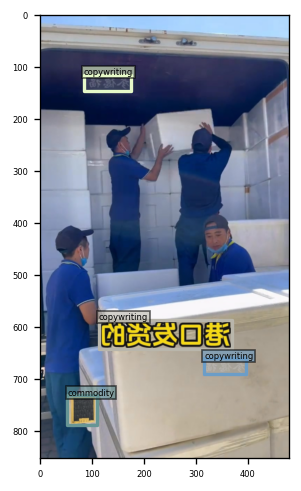

{'boxes': tensor([[0.8972, 0.9662, 0.1417, 0.0675],
        [0.4914, 0.6387, 0.6485, 0.1394],
        [0.2036, 0.7926, 0.2031, 0.0770]]), 'labels': tensor([8, 4, 4]), 'image_id': tensor([22211]), 'area': tensor([ 3937.8384, 37205.2461,  6431.2251]), 'iscrowd': tensor([0, 0, 0]), 'orig_size': tensor([1280,  720]), 'size': tensor([643, 640])}


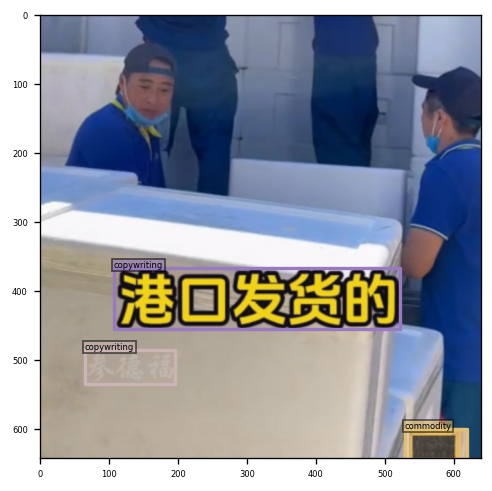

In [48]:
show_data(add_dataset, -2)

show_data(merge_dataset, -2)

show_data(merge_dataset_4, -2)
show_data(merge_dataset_3, -2)